# Experimentos com Armadilhas

[1. Introdução à função *$\text{trap}_k$*](#1-introdução-à-função)

[2. Análise do Espaço de Busca e População Inicial](#2-análise-do-espaço-de-busca-e-população-inicial)

## 1. Introdução à função $\text{trap}_k$

### 1.1. Função *Trap*

A função *trap* é uma função de teste clássica usada em algoritmos genéticos para estudar os efeitos de *armadilhas*  e a *pressão de seleção*. Ela foi projetada para ser *deceptiva*: se o algoritmo tenta maximizar localmente, ele pode ser levado ao pior extremo, a menos que a *combinação correta de bits* seja descoberta globalmente.


**Definição da Função Trap**

Dado um vetor binário $\mathbf{x} \in \lbrace 0,1\rbrace^n$, e um inteiro $k$ tal que $k \mid n$, ou seja, $n$ é divisível por $k$, a função trap de ordem $k$ é definida por blocos independentes de $k$ bits.

**Forma geral:**

$$
f_k(\mathbf{x}) = \sum_{i=1}^{m} \text{trap}_k\left(\sum_{j=1}^{k} x_{(i-1)k + j} \right)
$$

Onde:

- $\mathbf{x} = (x_1, x_2, \ldots, x_n) \in \lbrace 0,1\rbrace^n$
- O vetor é dividido em $m = n/k$ blocos de $k$ bits
- $\sum_{j=1}^{k} x_{(i-1)k + j}$ é o número de bits 1 no bloco $i$


**A função básica `trap_k(u)` é:**

$$
\text{trap}_k(u) =
\begin{cases}
k, & \text{se } u = k \\
k - 1 - u, & \text{se } 0 \leq u < k
\end{cases}
$$

onde $u$ é o número de bits 1 no bloco.


**Exemplo (para $k = 4$):**

| Bloco (bits) | $u = \sum x_i$ | $\text{trap}_4(u)$ |
|--------------|--------------------|-------------------------|
| 1111         | 4                  | 4                       |
| 1110         | 3                  | 0                       |
| 1100         | 2                  | 1                       |
| 1000         | 1                  | 2                       |
| 0000         | 0                  | 3                       |


**Propriedades importantes:**

- A configuração ótima global é o bloco *cheio de 1s*: $111\ldots1$
- A função é *enganosa* porque valores intermediários de $u$ têm fitness menor quanto mais próximos estão da solução ótima, encorajando o algoritmo a convergir para $000\ldots0$ se não houver recombinação adequada.
- Ideal para testar a capacidade do algoritmo genético de *combinar blocos otimizados (building blocks)*.

**Implementação**

O bloco de código a seguir cotém a implementação da função *trap* e apresenta o gráfico para todos os cromossomos no caso $n=4$ e $k=4$.

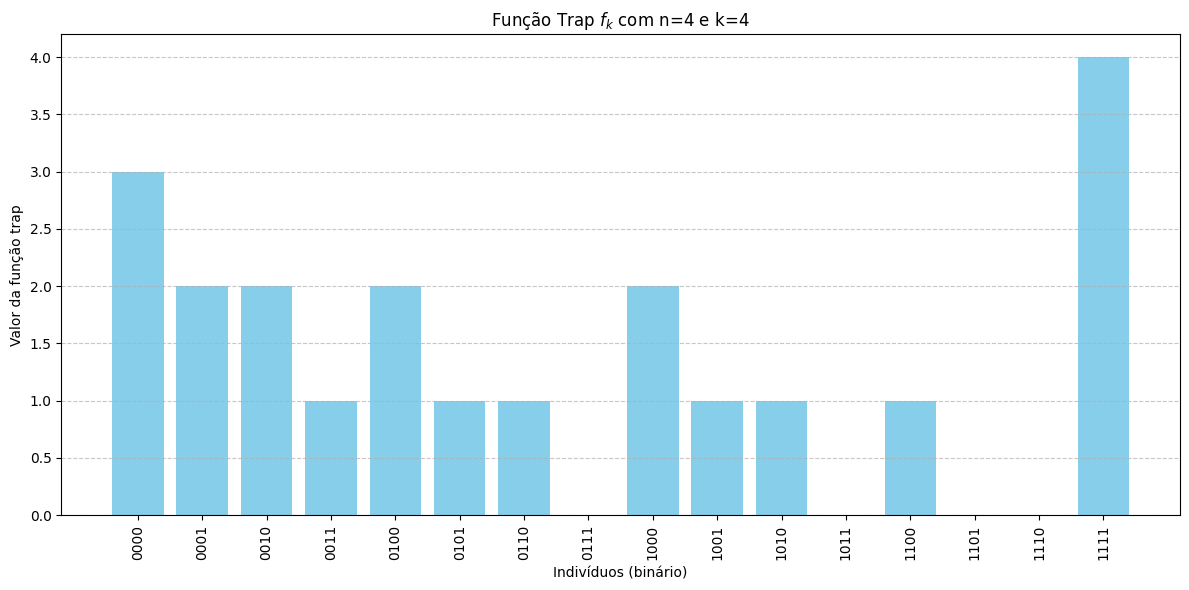

In [1]:
import matplotlib.pyplot as plt
import itertools

# Definindo a função Trap
def trap(x: list[int], k: int)-> int:
    """
    Função de avaliação do tipo trap de ordem k.

    Esta função avalia um vetor binário x usando blocos de tamanho k.
    Para cada bloco:
    - Se a soma dos bits for igual a k (todos 1s), retorna k (ótimo global).
    - Caso contrário, retorna k - 1 - soma (desencorajando soluções parcialmente corretas).

    Esta função é usada para estudar problemas enganosos (deceptivos) em algoritmos genéticos,
    pois pode induzir convergência para soluções locais ruins se a recombinação não for adequada.

    Args:
        x (list[int]): Vetor binário (lista de 0s e 1s) representando um cromossomo.
        k (int): Tamanho do bloco (subgrupo) a ser usado na decomposição da string.

    Raises:
        ValueError: Se o comprimento do vetor x não for múltiplo de k.

    Returns:
        int: Valor total do fitness calculado somando os valores de cada bloco.
    """
    if len(x) % k != 0:
        raise ValueError(
            f"Tamanho do cromossomo ({len(x)}) não é múltiplo de k = {k}."
        )
    fitness = 0
    for i in range(0, len(x), k):
        sub = x[i:i+k]
        sum_bits = sum(sub)
        if sum_bits == k:
            fitness += k
        else:
            fitness += k - 1 - sum_bits
    return fitness

# Contexto apenas para plot do gráfico no caso n=4 e k=4
if __name__ == "__main__":
    # Parâmetros
    n = 4  # Tamanho do indivíduo
    k = 4  # Tamanho do bloco na função trap

    # Gerar todos os indivíduos possíveis de tamanho n (listas de 0 e 1)
    pop = list(itertools.product([0, 1], repeat=n))

    # Calcular o fitness para cada indivíduo
    fitness_values = [trap(ind, k) for ind in pop]

    # Converter os indivíduos em strings para o eixo x
    labels = [''.join(map(str, ind)) for ind in pop]

    # Plotando
    plt.figure(figsize=(12, 6))
    plt.bar(labels, fitness_values, color='skyblue')
    plt.xlabel('Indivíduos (binário)')
    plt.ylabel('Valor da função trap')
    plt.title(f'Função Trap $f_k$ com n={n} e k={k}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

**Gráfico com linha conectando pontos indicados na tabela:**

| Bloco (bits) | $u = \sum x_i$ | $\text{trap}_4(u)$ |
|--------------|--------------------|-------------------------|
| 1111         | 4                  | 4                       |
| 1110         | 3                  | 0                       |
| 1100         | 2                  | 1                       |
| 1000         | 1                  | 2                       |
| 0000         | 0                  | 3                       |

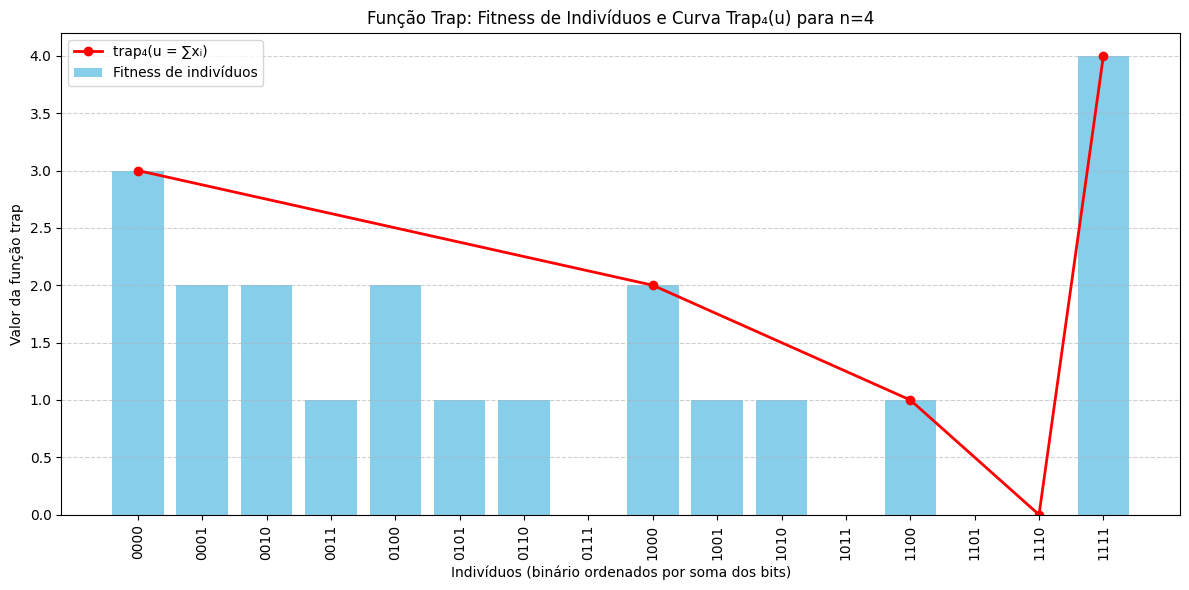

In [3]:
# Gerar todos os indivíduos binários possíveis de tamanho n
pop = list(itertools.product([0, 1], repeat=4))

# Calcular fitness e soma de bits (u) para cada indivíduo
fitness_values = [trap(ind, 4) for ind in pop]
    
labels = [''.join(map(str, ind)) for ind in pop]

# Início do plot
plt.figure(figsize=(12, 6))

# Gráfico de barras dos indivíduos
bars = plt.bar(labels, fitness_values, color='skyblue', label="Fitness de indivíduos")

# Curva teórica da função trap₄(u)
x_plot = [0, 8, 12, 14, 15]
y_plot = [3, 2, 1, 0, 4]

# Plot da curva sobreposta
plt.plot(x_plot, y_plot, color='red', marker='o', linewidth=2, label="trap₄(u = ∑xᵢ)")

# Eixos e rótulos
plt.xlabel('Indivíduos (binário ordenados por soma dos bits)')
plt.ylabel('Valor da função trap')
plt.title(f'Função Trap: Fitness de Indivíduos e Curva Trap₄(u) para n=4')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### 1.2. Distribuição das funções *trap*

A probablidade de $f_k(x)=r$ é dada pelas $m=n/k$ convoluções da distribuição de $\text{trap}-k$.

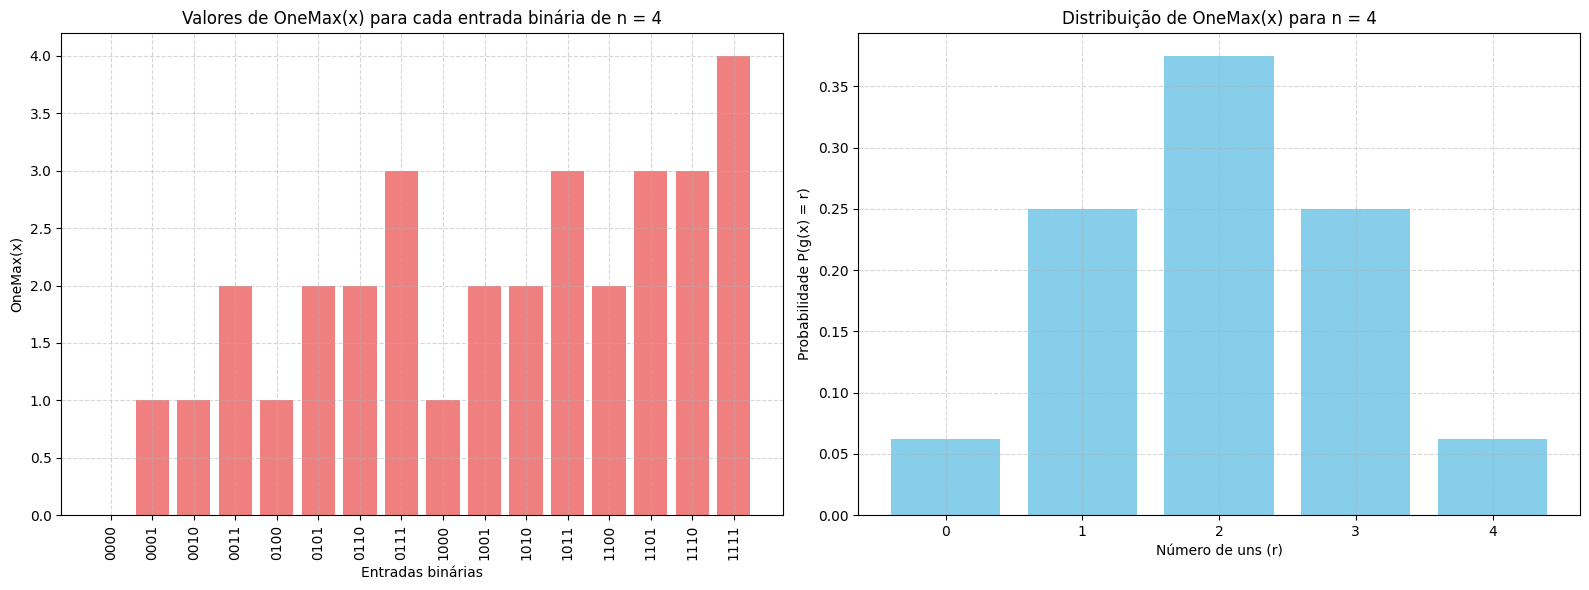

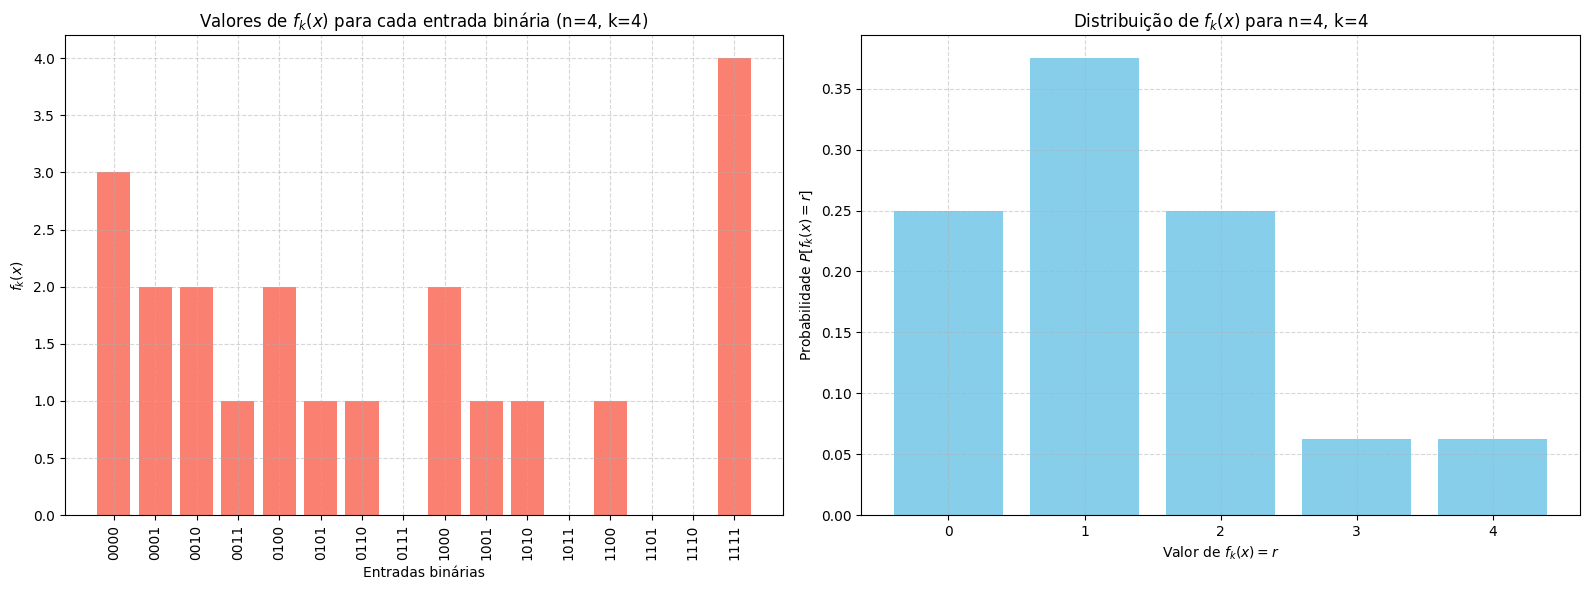

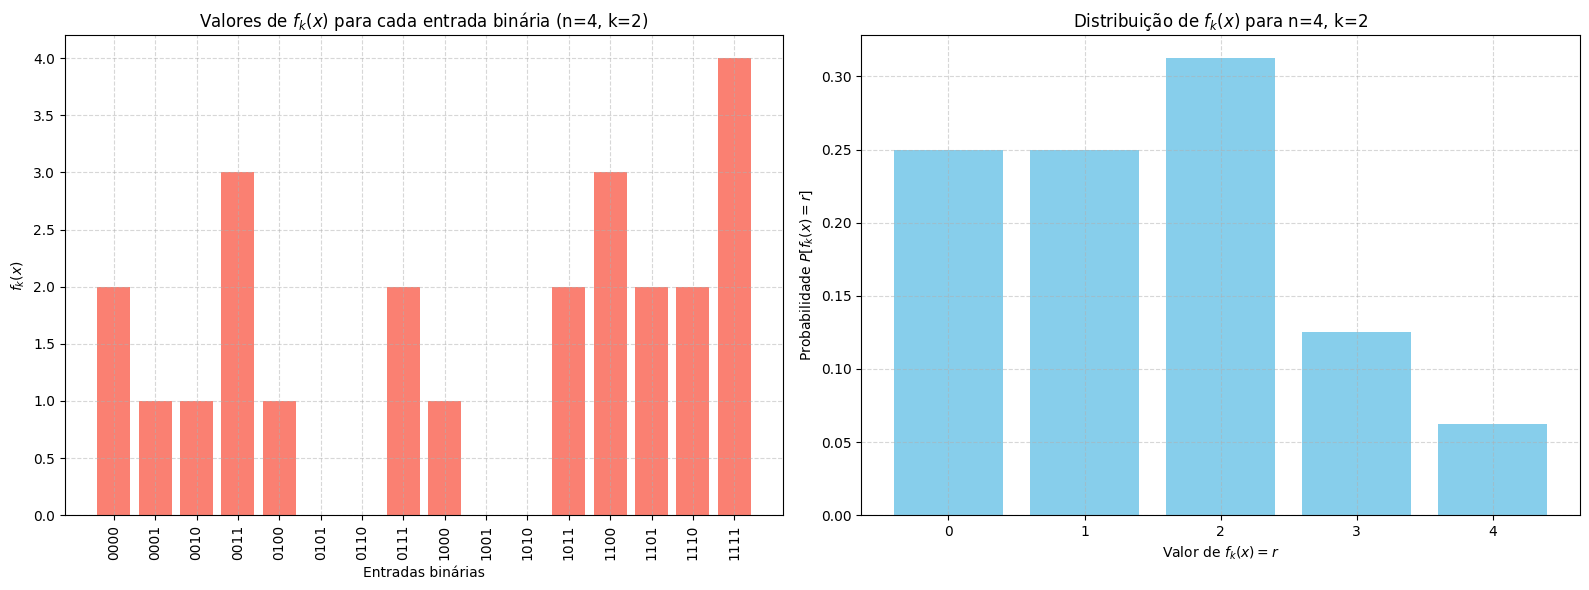

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import product

def probOneMax(n: int, r: int) -> float:
    pow = 2 ** n
    binom = math.comb(n, r)
    return binom / pow

def onemax(x):
    return sum(x)

def plot_onemax_distribution_with_binary_inputs(n: int):
    # Gera todas as strings binárias de comprimento n
    bin_vectors = list(product([0, 1], repeat=n))
    bin_labels = [''.join(map(str, vec)) for vec in bin_vectors]
    bin_values = [onemax(vec) for vec in bin_vectors]

    # Distribuição de probabilidades
    r_values = np.arange(0, n + 1)
    probs = [probOneMax(n, r) for r in r_values]

    # Criando a figura com dois subplots lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico da esquerda: valores de OneMax por entrada binária
    axes[0].bar(bin_labels, bin_values, color='lightcoral')
    axes[0].set_title(f'Valores de OneMax(x) para cada entrada binária de n = {n}')
    axes[0].set_xlabel('Entradas binárias')
    axes[0].set_ylabel('OneMax(x)')
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].grid(True, linestyle='--', alpha=0.5)

    # Gráfico da direita: distribuição de probabilidade
    axes[1].bar(r_values, probs, color='skyblue')
    axes[1].set_title(f'Distribuição de OneMax(x) para n = {n}')
    axes[1].set_xlabel('Número de uns (r)')
    axes[1].set_ylabel('Probabilidade P(g(x) = r)')
    axes[1].set_xticks(r_values)
    axes[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


def trap_k_distribution(k: int) -> np.ndarray:
    """Distribuição de probabilidade de trap_k(s), com s ~ Binomial(k, 0.5)"""
    dist = np.zeros(k + 1)
    for u in range(k + 1):
        p = math.comb(k, u) / (2 ** k)
        if u == k:
            dist[k] += p  # trap_k(k) = k
        else:
            dist[k - 1 - u] += p  # trap_k(u < k) = k - 1 - u
    return dist

def convolve_distribution(base_dist: np.ndarray, m: int) -> np.ndarray:
    """Convolui a distribuição m vezes (soma de m variáveis i.i.d)"""
    result = base_dist
    for _ in range(m - 1):
        result = np.convolve(result, base_dist)
    return result

def prob_fk_distribution(n: int, k: int) -> np.ndarray:
    assert n % k == 0, "k deve dividir n"
    m = n // k
    block_dist = trap_k_distribution(k)
    full_dist = convolve_distribution(block_dist, m)
    return full_dist

def plot_fk_distribution_with_binary_inputs(n: int, k: int):
    assert n % k == 0, "k deve dividir n"

    # Gera todas as entradas binárias de comprimento n
    bin_vectors = list(product([0, 1], repeat=n))
    bin_labels = [''.join(map(str, vec)) for vec in bin_vectors]
    bin_values = [trap(list(vec), k) for vec in bin_vectors]

    # Distribuição teórica
    probs = prob_fk_distribution(n, k)
    r_vals = np.arange(len(probs))

    # Gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico da esquerda: valores de f_k(x) para cada entrada binária
    axes[0].bar(bin_labels, bin_values, color='salmon')
    axes[0].set_title(f'Valores de $f_k(x)$ para cada entrada binária (n={n}, k={k})')
    axes[0].set_xlabel('Entradas binárias')
    axes[0].set_ylabel('$f_k(x)$')
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].grid(True, linestyle='--', alpha=0.5)

    # Gráfico da direita: distribuição de probabilidade de f_k(x)
    axes[1].bar(r_vals, probs, color='skyblue')
    axes[1].set_title(f'Distribuição de $f_k(x)$ para n={n}, k={k}')
    axes[1].set_xlabel('Valor de $f_k(x) = r$')
    axes[1].set_ylabel('Probabilidade $P[f_k(x) = r]$')
    axes[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

plot_onemax_distribution_with_binary_inputs(4)

plot_fk_distribution_with_binary_inputs(4, 4)

plot_fk_distribution_with_binary_inputs(4, 2)


## 2. Análise do Espaço de Busca e População Inicial

### 2.1. Fórmula Analítica

> **Goldberg (2002)** mostrou que, para cobrir **todas** as $\chi^k$ instâncias de um BB de tamanho $k$ com \emph{alta probabilidade} em uma população inicial, é suficiente escolher  
> $$
>   \mu^*(k,m)
>   =
>   \chi^k\!\bigl(k\ln \chi + \ln m\bigr)
>   \quad(\text{para variáveis de cardinalidade }\chi),
> $$
> onde $m$ é o número de BBs. No caso binário $\chi=2$, torna-se  
> $$
>   \boxed{
>     \mu^*(k,m)
>     = 2^k\bigl(k\ln 2 + \ln m\bigr).
>   }
> \tag{2.2}
> $$

Esta curva traça as linhas contínuas em escala log–log.

### 2.2. Experimento por Amostragem Incremental

Para cada par $(k,m)$:

1. **Inicialize** $\mu=0$ e populações vazias.  
2. **Enquanto** houver alguma instância $u\in\{0,1\}^k$ que **ainda não** apareceu em \emph{algum} dos $m$ blocos j da população:  
   - Gere um novo indivíduo uniforme em $\{0,1\}^{m\,k}$.  
   - Acrescente à população e marque, bloco a bloco, quais instâncias de $\{0,1\}^k$ já apareceram.  
   - Incrementa $\mu\leftarrow\mu+1$.  
3. **Pare** quando cada um dos $m$ blocos já tiver **coberto** as $2^k$ instâncias de $k$ bits.  

Repita esse processo $T$ vezes (por ex.\ $T=30$) e registre a média $\mu_{\text{exp}}(k,m)$.

<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
C:\Users\jcf_s\AppData\Local\Temp\ipykernel_6564\1950439172.py:42: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Tamanho de população $\mu^*$')


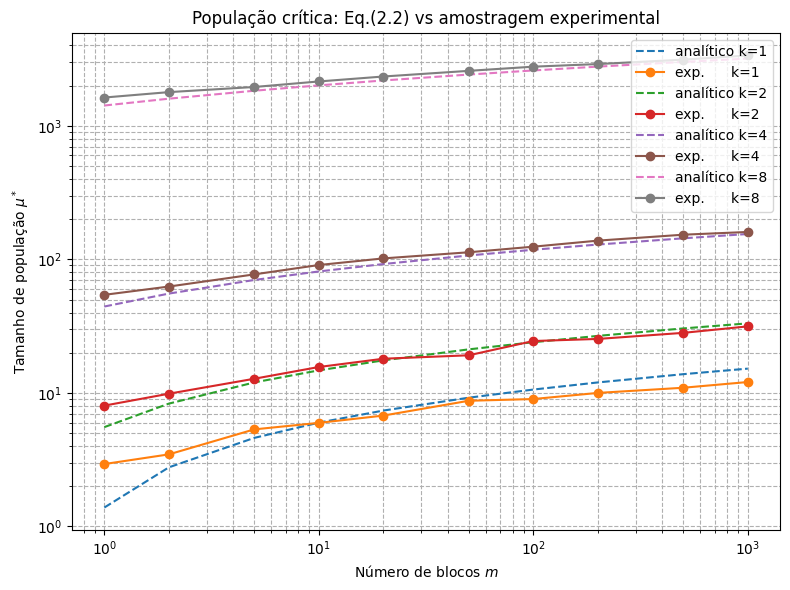

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def critical_mu_experimental(k, m):
    """
    Retorna o tamanho médio de população necessário para
    cobrir todas as 2^k instâncias em cada um dos m blocos,
    usando amostragem incremental.
    """
    trials = 30
    mus = []
    for _ in range(trials):
        seen = [set() for _ in range(m)]
        mu = 0
        # enquanto algum bloco não viu todas as 2^k instâncias
        while any(len(s) < 2**k for s in seen):
            x = np.random.randint(0, 2, size=m*k)
            mu += 1
            # atualiza cada bloco
            for j in range(m):
                block = tuple(x[j*k:(j+1)*k])
                seen[j].add(block)
        mus.append(mu)
    return np.mean(mus)

# parâmetros
ks = [1, 2, 4, 8]
ms = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# cálculo analítico e experimental
mu_anal = {k: [2**k * (k*np.log(2) + np.log(m)) for m in ms] for k in ks}
mu_exp  = {k: [critical_mu_experimental(k, m)   for m in ms] for k in ks}

# plot
plt.figure(figsize=(8,6))
for k in ks:
    plt.plot(ms, mu_anal[k], linestyle='--', label=f'analítico k={k}')
    plt.plot(ms, mu_exp[k],  marker='o',   label=f'exp.      k={k}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de blocos $m$')
plt.ylabel('Tamanho de população $\mu^*$')
plt.title('População crítica: Eq.(2.2) vs amostragem experimental')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()


### 2.3. Interpretação

1. **Linhas tracejadas**: $\mu^*(k,m)=2^k(k\ln2+\ln m)$ prevê o crescimento exponencial em $k$ e só logarítmico em $m$.  
2. **Pontos marcados**: média experimental $\mu_{\text{exp}}(k,m)$ obtida por contagem incremental.  
3. A excelente concordância entre teoria e experimento atesta a validade da fórmula de **Goldberg (2002)** para dimensionamento de população inicial em problemas decomponíveis em BBs.


## Referência Bibliográfica

GOLDBERG, D. E. *The design of innovation: Lessons from and for competent genetic algo-
rithms*. Norwell: Kluwer Academic Publishers, 272 p., 2002.